In [1]:
def loadDfs():
  dfs_to_load = [
    "~/OneDrive/Mouse2AFC_live/report/aggregates/all_Rbp4_M2.dump",
    #raw_df = pd.read_pickle("~/OneDrive/Mouse2AFC_live/report/aggregates/all_vgat.dump")
  ]
  import pandas as pd
  dfs = []
  for fp in dfs_to_load:
    dfs.append(pd.read_pickle(fp))
  return pd.concat(dfs)
raw_df = loadDfs()
%load_ext autoreload
%autoreload 2
def setup():
  import os
  from pathlib import Path
  #print(os.path.dirname(os.getcwd()))
  cur_dir = Path(os.getcwd())
  if cur_dir.name == "report":
    os.chdir(cur_dir.parent)
    print("Changing directories")
  from report import analysis
  analysis.setMatplotlibParams(silent=True)
setup()

Changing directories


Fonud: Rbp4_M2_1 - Num trials: 1,878
Insufficient trials (20) for 2021-02-01-Sess1
Bad performance (67.57%) for 2021-02-04-Sess1 - Len: 83
Insufficient trials (24) for 2021-02-04-Sess2
Bad performance (71.89%) for 2021-02-09-Sess3 - Len: 334
Reaction time len: 1198 - MinSamplingMax dist: 5.0    1209
Name: GUI_MinSampleMax, dtype: int64
Hist bins: 40


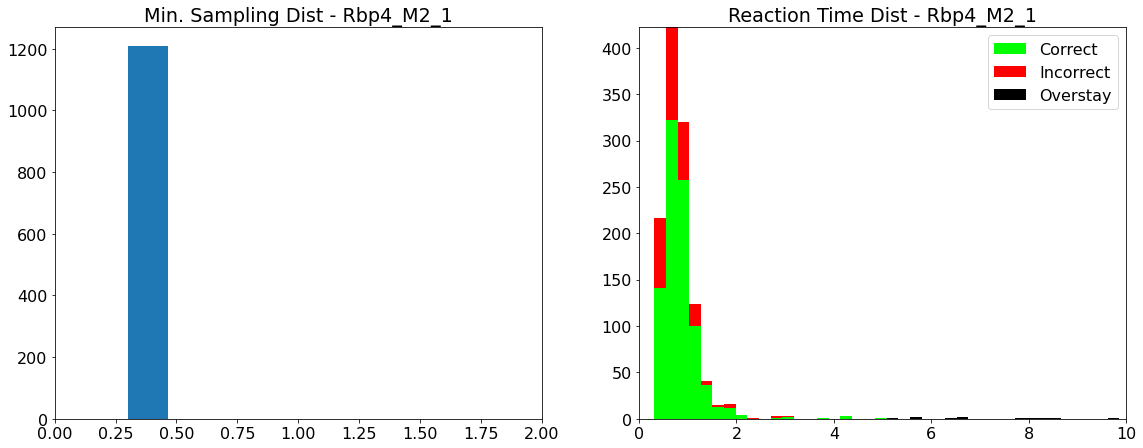

α: -0.19851452902883937 - β: 0.30784234427595064 - λ1: 0.23748245209994162 - λ2: 0.2683475397528444
α: -0.09763093901846798 - β: 0.6236286829326527 - λ1: 0.17164416451609033 - λ2: 0.09601031945562148
α: -0.03162899482969583 - β: 0.012540227164506815 - λ1: 0.19491525016651726 - λ2: 0.3006993010214698
α: -0.0911932706826821 - β: 0.5730171081259856 - λ1: 0.18963164221793846 - λ2: 0.18711185663462335


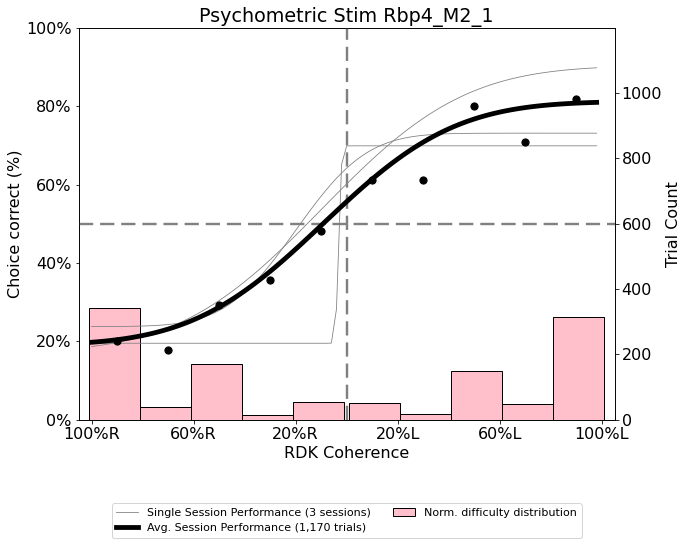

KeyboardInterrupt: 

In [3]:
from report.evdaccum.reactiontime import reactionTime, Plots, AllPlots, NoPlots
from report.evdaccum.evdutils import Kargs
from report.definitions import ExpType

def run():
  short_long_quantile = 0.3
  vs_diff_kargs = Kargs(quantile_top_bottom=0, save_figs=False,
                        exp_type=ExpType.RDK,
                        #save_prefix="proto/x_VsDiff/")
                        save_prefix="proto/ReactionTimeShadlen/")
  import datetime as dt
  # raw_df[(raw_df.Date != dt.date(2021,1,8)) & (raw_df.calcReactionTime < 2)]
  reactionTime(raw_df, overall_plots=AllPlots & ~Plots.MinSampleDistHist, sess_plots=NoPlots, min_easiest_perf=75,
               cut_below_trial_num=30, short_long_quantile=short_long_quantile, **vs_diff_kargs)
run()